# FLOW
Here's the updated project flow incorporating your plan to analyze indicators one at a time and in combinations:

1. **Data Acquisition:**
   - Fetch Nifty 50 data from Yahoo Finance for the period 2014-2024.
   - Clean and preprocess the data.
   - **Output:** Cleaned dataset.

2. **Feature Engineering (Indicators):**
   - **Leading Indicators:**
     - Start with the first leading indicator (e.g., RSI).
     - Apply it to the dataset.
     - Train LSTM, GRU, and RNN models using the dataset with this indicator.
     - **Output:** Trained models and performance metrics.

   - **Lagging Indicators:**
     - Start with the first lagging indicator (e.g., SMA).
     - Apply it to the dataset.
     - Train LSTM, GRU, and RNN models using the dataset with this indicator.
     - **Output:** Trained models and performance metrics.

3. **Combining Indicators:**
   - **Single Leading and Lagging Indicator:**
     - Combine the first leading indicator (e.g., RSI) and the first lagging indicator (e.g., SMA).
     - Train models using this combined dataset.
     - **Output:** Trained models and performance metrics.

   - **First Leading and Second Leading Indicator:**
     - Add the second leading indicator (e.g., MACD) to the first leading indicator dataset.
     - Train models using this new dataset.
     - **Output:** Trained models and performance metrics.

   - **First Lagging and Second Lagging Indicator:**
     - Add the second lagging indicator (e.g., EMA) to the first lagging indicator dataset.
     - Train models using this new dataset.
     - **Output:** Trained models and performance metrics.

   - **Combining Leading and Lagging Indicators:**
     - Combine the first leading indicator and the second lagging indicator.
     - Train models using this combined dataset.
     - **Output:** Trained models and performance metrics.

4. **Evaluation and Prediction:**
   - Evaluate all trained models on the testing dataset.
   - Compare the performance of each combination.
   - Use the best-performing models to make predictions on unseen data.
   - **Output:** Performance metrics and predicted values.

5. **Backtesting:**
   - Simulate trading strategies based on the best predictions.
   - Analyze the performance of these strategies.
   - **Output:** Backtest results.

6. **Model Saving:**
   - Save the final models and exported results.
   - **Output:** Saved model files and results.

7. **Final Output:**
   - Visualize the comparison between predicted and actual values.
   - Save the complete notebook and results.

This structure allows for a systematic approach to testing each indicator and their combinations while evaluating their impact on model performance. Let me know if you need any more adjustments!

# Data Acquisition

```
# Data Acquisition
```



In [1]:
!pip install yfinance pandas numpy matplotlib scikit-learn


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [3]:
# prompt: LOAD THIS FILE /content/NSE50.csv

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data from the CSV file
df = pd.read_csv('/content/NSE50.csv')

# Display the first few rows of the DataFrame to check if data is loaded correctly
print(df.head())

# Now you can proceed with the rest of your data preprocessing and analysis steps.
# ... (your code for data cleaning, feature engineering, model training, etc.)

FileNotFoundError: [Errno 2] No such file or directory: '/content/NSE50.csv'

# **Feature Engineering (Indicators)**

## Calculate Leading Indicators

In [ ]:
import pandas as pd
import numpy as np

# Load Nifty 50 data from the CSV file
nifty_data = pd.read_csv('/content/NSE50.csv', parse_dates=['Date'], index_col='Date')

# Define functions for each indicator (as described previously)
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def compute_macd(data, short_window=12, long_window=26, signal_window=9):
    exp1 = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

def compute_stochastic_oscillator(data, k_window=14, d_window=3):
    lowest_low = data['Low'].rolling(window=k_window).min()
    highest_high = data['High'].rolling(window=k_window).max()
    stoch_k = 100 * ((data['Close'] - lowest_low) / (highest_high - lowest_low))
    stoch_d = stoch_k.rolling(window=d_window).mean()
    return stoch_k, stoch_d

def compute_williams_r(data, window=14):
    highest_high = data['High'].rolling(window=window).max()
    lowest_low = data['Low'].rolling(window=window).min()
    return -100 * ((highest_high - data['Close']) / (highest_high - lowest_low))

def compute_adx(data, window=14):
    data['high_low'] = data['High'] - data['Low']
    data['high_prev_close'] = abs(data['High'] - data['Close'].shift(1))
    data['low_prev_close'] = abs(data['Low'] - data['Close'].shift(1))
    data['true_range'] = data[['high_low', 'high_prev_close', 'low_prev_close']].max(axis=1)

    data['+DM'] = np.where((data['High'].diff() > data['Low'].diff()) & (data['High'].diff() > 0), data['High'].diff(), 0)
    data['-DM'] = np.where((data['Low'].diff() < data['High'].diff()) & (data['Low'].diff() < 0), -data['Low'].diff(), 0)
    data['+DI'] = 100 * (data['+DM'].rolling(window=window).sum() / data['true_range'].rolling(window=window).sum())
    data['-DI'] = 100 * (data['-DM'].rolling(window=window).sum() / data['true_range'].rolling(window=window).sum())
    data['adx'] = 100 * (abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])).rolling(window=window).mean()
    return data['adx']

def compute_roc(data, window=12):
    return data['Close'].diff(window).div(data['Close'].shift(window)).mul(100)

def compute_cmf(data, window=20):
    money_flow_multiplier = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low'])
    money_flow_volume = money_flow_multiplier * data['Volume']
    cmf = money_flow_volume.rolling(window=window).sum() / data['Volume'].rolling(window=window).sum()
    return cmf

def compute_cci(data, window=14):
    typical_price = (data['High'] + data['Low'] + data['Close']) / 3
    sma = typical_price.rolling(window=window).mean()
    mean_deviation = typical_price.rolling(window=window).apply(lambda x: np.mean(np.abs(x - x.mean()), axis=0))
    return (typical_price - sma) / (0.015 * mean_deviation)

def compute_obv(data):
    obv = (np.sign(data['Close'].diff()) * data['Volume']).cumsum()
    return obv

def compute_momentum(data, window=10):
    return data['Close'].diff(window)

def compute_sma(data, window):
    return data['Close'].rolling(window=window).mean()

def compute_ema(data, window):
    return data['Close'].ewm(span=window, adjust=False).mean()

def compute_bollinger_bands(data, window=20):
    sma = compute_sma(data, window)
    std_dev = data['Close'].rolling(window=window).std()
    upper_band = sma + (std_dev * 2)
    lower_band = sma - (std_dev * 2)
    return upper_band, lower_band

def compute_atr(data, window=14):
    high_low = data['High'] - data['Low']
    high_close = abs(data['High'] - data['Close'].shift(1))
    low_close = abs(data['Low'] - data['Close'].shift(1))
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    return tr.rolling(window=window).mean()

def compute_parabolic_sar(data, step=0.02, max_step=0.2):
    sar = np.zeros(len(data))
    long = True
    ep = data['High'][0]
    af = step
    sar[0] = data['Low'][0]

    for i in range(1, len(data)):
        sar[i] = sar[i - 1] + af * (ep - sar[i - 1])

        if long:
            if data['Low'][i] < sar[i]:
                long = False
                sar[i] = ep
                ep = data['Low'][i]
                af = step
        else:
            if data['High'][i] > sar[i]:
                long = True
                sar[i] = ep
                ep = data['High'][i]
                af = step

        if long:
            ep = max(ep, data['High'][i])
        else:
            ep = min(ep, data['Low'][i])

        af = min(af + step, max_step)

    return sar

def compute_ichimoku_cloud(data):
    nine_period_high = data['High'].rolling(window=9).max()
    nine_period_low = data['Low'].rolling(window=9).min()
    data['tenkan_sen'] = (nine_period_high + nine_period_low) / 2

    period26_high = data['High'].rolling(window=26).max()
    period26_low = data['Low'].rolling(window=26).min()
    data['kijun_sen'] = (period26_high + period26_low) / 2

    data['senkou_span_a'] = ((data['tenkan_sen'] + data['kijun_sen']) / 2).shift(26)
    data['senkou_span_b'] = ((data['High'].rolling(window=52).max() + data['Low'].rolling(window=52).min()) / 2).shift(26)
    data['chikou_span'] = data['Close'].shift(-26)

    return data[['tenkan_sen', 'kijun_sen', 'senkou_span_a', 'senkou_span_b', 'chikou_span']]

def compute_volume_moving_average(data, window):
    return data['Volume'].rolling(window=window).mean()

# Calculate Leading Indicators
nifty_data['RSI'] = compute_rsi(nifty_data)
nifty_data['MACD'], nifty_data['MACD_Signal'] = compute_macd(nifty_data)
nifty_data['Stochastic_K'], nifty_data['Stochastic_D'] = compute_stochastic_oscillator(nifty_data)
nifty_data['Williams_%R'] = compute_williams_r(nifty_data)
nifty_data['ADX'] = compute_adx(nifty_data)
nifty_data['ROC'] = compute_roc(nifty_data)
nifty_data['CMF'] = compute_cmf(nifty_data)
nifty_data['CCI'] = compute_cci(nifty_data)
nifty_data['OBV'] = compute_obv(nifty_data)
nifty_data['Momentum'] = compute_momentum(nifty_data)

# Calculate Lagging Indicators
nifty_data['SMA_20'] = compute_sma(nifty_data, 20)
nifty_data['EMA_20'] = compute_ema(nifty_data, 20)
nifty_data['Bollinger_Upper'], nifty_data['Bollinger_Lower'] = compute_bollinger_bands(nifty_data, 20)
nifty_data['ATR'] = compute_atr(nifty_data)
nifty_data['Parabolic_SAR'] = compute_parabolic_sar(nifty_data)

# Save the updated DataFrame to a new CSV file
nifty_data.to_csv('/content/NSE501.csv')


In [ ]:
# prompt: print(data.head(/content/NSE501.csv))

import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('/content/NSE501.csv')

print(data.head())

In [ ]:
# Option 1: Drop rows with NaN values
nifty_data.dropna(inplace=True)

# Option 2: Fill NaN values (optional, if you want to keep all data)
# nifty_data.fillna(method='ffill', inplace=True)  # Forward fill
# nifty_data.fillna(method='bfill', inplace=True)  # Backward fill

# Save the updated DataFrame to a new CSV file
nifty_data.to_csv('/content/NSE501.csv')


In [ ]:
# prompt: print(data.head(/content/NSE501.csv))

import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('/content/NSE501.csv')

print(data.head())

In [ ]:
import pandas as pd

# Load the data
nifty_data = pd.read_csv('/content/NSE50.csv', parse_dates=['Date'])
nifty_data.set_index('Date', inplace=True)

# Step 1: Remove duplicate rows
nifty_data.drop_duplicates(inplace=True)

# Step 2: Handle missing values
nifty_data.dropna(inplace=True)  # Option to drop
# nifty_data.fillna(method='ffill', inplace=True)  # Or forward-fill

# Step 3: Ensure proper data types
nifty_data = nifty_data.astype({
    'Open': 'float64',
    'High': 'float64',
    'Low': 'float64',
    'Close': 'float64',
    'Adj Close': 'float64',
    'Volume': 'int64'
})

# Step 4: Standardize column names
nifty_data.columns = nifty_data.columns.str.lower().str.replace(' ', '_')

# Step 5: Remove unnecessary columns (if any)
# nifty_data.drop(columns=['unnecessary_column'], inplace=True)

# Step 6: Outlier detection and handling
# You can use IQR or Z-score method to find outliers

# Step 7: Feature scaling (optional)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# nifty_data[['open', 'high', 'low', 'close', 'adj_close', 'volume']] = scaler.fit_transform(nifty_data[['open', 'high', 'low', 'close', 'adj_close', 'volume']])

# Step 8: Add additional features (if required)
# nifty_data['lagged_close'] = nifty_data['close'].shift(1)

# Final check
print(nifty_data.info())
print(nifty_data.head())

# Save the cleaned data
nifty_data.to_csv('/content/NSE501_cleaned.csv')


### **Relative Strength Index (RSI)**

In [ ]:
import pandas as pd
import numpy as np

# Load your data (replace this with your actual data loading code)
# data = pd.read_csv('your_nifty_data.csv')

# Calculate RSI
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Add RSI to the DataFrame
data['RSI'] = compute_rsi(data)

# Save the updated DataFrame to a new CSV file
data.to_csv('NSE501.csv', index=False)

# Display the first few rows of the updated DataFrame
print(data.head())


### Moving Average Convergence Divergence (MACD)


In [ ]:
# Calculate MACD
def compute_macd(data, short_window=12, long_window=26, signal_window=9):
    exp1 = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Add MACD and Signal to the DataFrame
data['MACD'], data['MACD_Signal'] = compute_macd(data)

# Save the updated DataFrame to the same CSV file
data.to_csv('NSE501.csv', index=False)

# Display the first few rows of the updated DataFrame
print(data.head())


### Stochastic Oscillator

In [ ]:
import pandas as pd

# Function to compute Stochastic Oscillator
def compute_stochastic_oscillator(data, k_window=14, d_window=3):
    lowest_low = data['Low'].rolling(window=k_window).min()
    highest_high = data['High'].rolling(window=k_window).max()
    stoch_k = 100 * ((data['Close'] - lowest_low) / (highest_high - lowest_low))
    stoch_d = stoch_k.rolling(window=d_window).mean()
    return stoch_k, stoch_d

# Load your dataset
data = pd.read_csv('/content/NSE50.csv')  # Path to your dataset
data['Stoch_K'], data['Stoch_D'] = compute_stochastic_oscillator(data)

# Display the last few rows to check the output
print(data[['Date', 'Close', 'Stoch_K', 'Stoch_D']].tail())


### Williams %R


In [ ]:
import pandas as pd

# Function to compute Williams %R
def compute_williams_r(data, window=14):
    highest_high = data['High'].rolling(window=window).max()
    lowest_low = data['Low'].rolling(window=window).min()
    return -100 * ((highest_high - data['Close']) / (highest_high - lowest_low))

# Load your dataset
data = pd.read_csv('/content/NSE50.csv')  # Path to your dataset
data['Williams_R'] = compute_williams_r(data)

# Display the last few rows to check the output
print(data[['Date', 'Close', 'Williams_R']].tail())


### Average Directional Index (ADX

In [ ]:
import pandas as pd
import numpy as np

# Function to compute ADX
def compute_adx(data, window=14):
    data['high_low'] = data['High'] - data['Low']
    data['high_prev_close'] = abs(data['High'] - data['Close'].shift(1))
    data['low_prev_close'] = abs(data['Low'] - data['Close'].shift(1))
    data['true_range'] = data[['high_low', 'high_prev_close', 'low_prev_close']].max(axis=1)

    data['+DM'] = np.where((data['High'].diff() > data['Low'].diff()) & (data['High'].diff() > 0), data['High'].diff(), 0)
    data['-DM'] = np.where((data['Low'].diff() < data['High'].diff()) & (data['Low'].diff() < 0), -data['Low'].diff(), 0)
    data['+DI'] = 100 * (data['+DM'].rolling(window=window).sum() / data['true_range'].rolling(window=window).sum())
    data['-DI'] = 100 * (data['-DM'].rolling(window=window).sum() / data['true_range'].rolling(window=window).sum())

    adx = 100 * (abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])).rolling(window=window).mean()
    return adx

# Load your dataset
data = pd.read_csv('/content/NSE50.csv')  # Path to your dataset
data['ADX'] = compute_adx(data)

# Display the last few rows to check the output
print(data[['Date', 'Close', 'ADX']].tail())


### Rate of Change (ROC)

In [ ]:
import pandas as pd

# Function to compute Rate of Change (ROC)
def compute_roc(data, window=14):
    return (data['Close'].diff(window) / data['Close'].shift(window)) * 100

# Load your dataset
data = pd.read_csv('/content/NSE50.csv')  # Path to your dataset
data['ROC'] = compute_roc(data)

# Display the last few rows to check the output
print(data[['Date', 'Close', 'ROC']].tail())


### Chaikin Money Flow (CMF)


In [ ]:
import pandas as pd

# Function to compute Chaikin Money Flow (CMF)
def compute_cmf(data, window=20):
    data['mfv'] = (data['Close'] - data['Low'] - (data['High'] - data['Close'])) / (data['High'] - data['Low']) * data['Volume']
    return data['mfv'].rolling(window=window).sum() / data['Volume'].rolling(window=window).sum()

# Load your dataset
data = pd.read_csv('/content/NSE50.csv')  # Path to your dataset
data['CMF'] = compute_cmf(data)

# Display the last few rows to check the output
print(data[['Date', 'Close', 'CMF']].tail())


### Commodity Channel Index (CCI)

In [ ]:
import pandas as pd

# Function to compute Commodity Channel Index (CCI)
def compute_cci(data, window=20):
    typical_price = (data['High'] + data['Low'] + data['Close']) / 3
    sma = typical_price.rolling(window=window).mean()
    mean_deviation = (typical_price - sma).abs().rolling(window=window).mean()
    return (typical_price - sma) / (0.015 * mean_deviation)

# Load your dataset
data = pd.read_csv('/content/NSE50.csv')  # Path to your dataset
data['CCI'] = compute_cci(data)

# Display the last few rows to check the output
print(data[['Date', 'Close', 'CCI']].tail())


### On-Balance Volume (OBV)


In [ ]:
import pandas as pd

# Function to compute On-Balance Volume (OBV)
def compute_obv(data):
    obv = [0]  # Start OBV with 0
    for i in range(1, len(data)):
        if data['Close'].iloc[i] > data['Close'].iloc[i - 1]:
            obv.append(obv[-1] + data['Volume'].iloc[i])
        elif data['Close'].iloc[i] < data['Close'].iloc[i - 1]:
            obv.append(obv[-1] - data['Volume'].iloc[i])
        else:
            obv.append(obv[-1])
    return obv

# Load your dataset
data = pd.read_csv('/content/NSE50.csv')  # Path to your dataset
data['OBV'] = compute_obv(data)

# Display the last few rows to check the output
print(data[['Date', 'Close', 'OBV']].tail())


### Momentum Indicator

In [ ]:
import pandas as pd

# Function to compute Momentum Indicator
def compute_momentum(data, window=10):
    return data['Close'].diff(window)

# Load your dataset
data = pd.read_csv('/content/NSE50.csv')  # Path to your dataset
data['Momentum'] = compute_momentum(data)

# Display the last few rows to check the output
print(data[['Date', 'Close', 'Momentum']].tail())


In [ ]:
# Save the updated DataFrame to a new CSV file
data.to_csv('/content/NSE50_with_indicators.csv', index=False)


In [ ]:
import pandas as pd

# Load your initial dataset
data = pd.read_csv('/content/NSE50.csv')

# Compute indicators (make sure you include all your indicator functions here)
data['RSI'] = compute_rsi(data)  # Example function, repeat for all indicators
data['MACD'], data['Signal'] = compute_macd(data)  # Example function
data['Stoch_K'], data['Stoch_D'] = compute_stochastic(data)  # Example function
data['Williams_R'] = compute_williams(data)  # Example function
data['ADX'] = compute_adx(data)  # Example function
data['ROC'] = compute_roc(data)  # Example function
data['CMF'] = compute_cmf(data)  # Example function
data['CCI'] = compute_cci(data)  # Example function
data['OBV'] = compute_obv(data)  # Example function
data['Momentum'] = compute_momentum(data)  # Example function

# Save the updated DataFrame to a new CSV file
data.to_csv('/content/NSE50_with_indicators.csv', index=False)


# LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}')


Training data shape: (1950, 14, 1), Testing data shape: (488, 14, 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer for prediction

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0999 - val_loss: 0.0339
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0386 - val_loss: 0.0338
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0377 - val_loss: 0.0360
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0374 - val_loss: 0.0335
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0376 - val_loss: 0.0362
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0411 - val_loss: 0.0336
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0381 - val_loss: 0.0349
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0357 - val_loss: 0.0333
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - val_loss: 0.0332
Epoch 10/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0378 - val_loss: 0.0339
Epoch 11/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0362 - val_loss: 0.0329
Epoch 12/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)

# Inverse scaling to get actual values
y_pred_rescaled = scaler.inverse_transform(np.hstack((y_pred, np.zeros((y_pred.shape[0], 1)))))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1)))))[:, 0]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


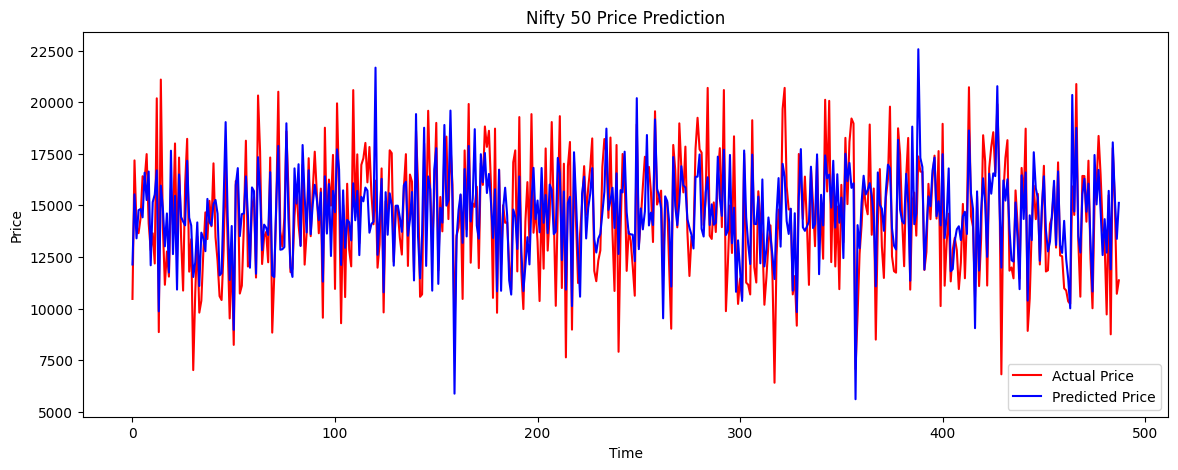

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_rescaled, color='red', label='Actual Price')
plt.plot(y_pred_rescaled, color='blue', label='Predicted Price')
plt.title('Nifty 50 Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
